# Intro to Linear Algebra - Inverse

### Key Equation: $Ax =b ~~ \text{for} ~~ n \times n $

The starting linear algebra problem is solving - `n` linear equation, with `n` unknowns

# 2 x 2 Equation

Let us start with the most simple one - 2 linear equations, with 2 unknown.

$$ x + 3y = 15 $$
$$ 2x - y = 2 $$


## Algebaric (2 x 2)

Now it is easy to solve the equation and get the answer.

$$ x + 3y = 15 ~~~~ \space (eq1)$$
$$ 2x - y = 2 ~~~~ \space (eq2)$$

### E<sub>1</sub> elimination 
We keep the first equation as it is and we elminate `x` from the second equation. 

To do that we multiply the first equation by 2 and subtract from the first equation i.e. $eq2 - 2* eq1$ 

$$ x + 3y = 15  ~~~~ \space (eq1) $$ 
$$  -7y = -28  ~~~~ \space (eq3)$$

### E<sub>2</sub> elimination
Now we do back elimination and we eliminate `y` from the first equation 

We  divide the the third equation by -7 i.e. $eq3 / -7 $ And we multiply the third equation by 3/7 and add it to the first equation i.e. $eq3 * 3 /7 + eq1$. 

$$ x = 3  ~~~~ \space (eq4) $$ 
$$  y = 4  ~~~~ \space (eq5)$$

And there is our answer.

This is a simplified representation of the *Gauss-Jordan Elimination*

## Row-wise / Lines (2 x 2)
Let us solve this the traditional way by thinking of them as row wise and solving it. We can plot each of these queations and see where they intersect.

$$ x + 3y = 15 ~~~~ \textit{(row 1) }$$
$$ 2x - y = 2  ~~~~ \textit{(row 2) }$$

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'y')

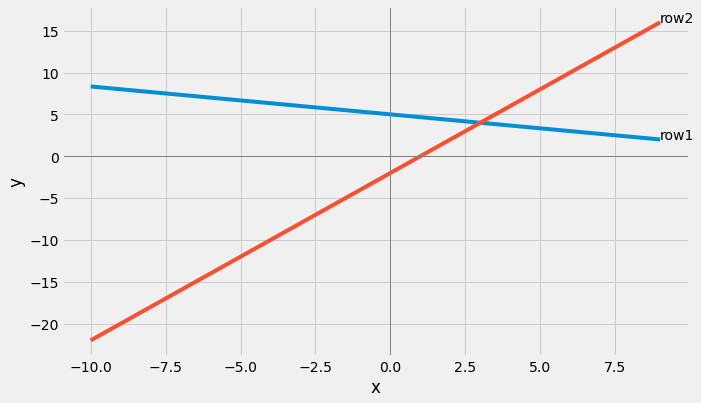

In [3]:
x = np.arange(-10, 10, 1)

y1 = (15 - x)/3
y2 = (2 - 2*x)/-1

plt.plot(x, y1)
plt.text(x[-1], y1[-1], 'row1')

plt.plot(x, y2)
plt.text(x[-1], y2[-1], 'row2')

plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)

plt.xlabel('x')
plt.ylabel('y')

## Column-wise  / Vectors (2x2)

We can also solve this equation in a vector way, by thinking of this as linear combination of two vectors

$$ \begin{bmatrix}1 \\ 2\end{bmatrix} x + \begin{bmatrix}3 \\ -1\end{bmatrix} y = \begin{bmatrix}15 \\ 2\end{bmatrix} $$

Now we need to draw these vectors and see the result

In [4]:
# All the vectors start at 0, 0 
vX1 = np.array([0,0,1,2])
vY1 = np.array([0,0,3,-1])
b = np.array([0,0,15,2])

In [5]:
vector1 = [vX1, vY1, b]

In [6]:
X,Y,U,V = zip(*vector1)

In [7]:
X,Y,U,V 

((0, 0, 0), (0, 0, 0), (1, 3, 15), (2, -1, 2))

In [8]:
def vector_plot (vector):
    X,Y,U,V = zip(*vector)
    C = [1,2,3]
    plt.figure()
    ax = plt.gca()
    ax.quiver(X,Y,U,V,C, angles='xy',scale_units='xy',scale=1)
    ax.set_xlim([-15,15])
    ax.set_ylim([-9,9])
    plt.axhline(0, color='grey', linewidth=1)
    plt.axvline(0, color='grey', linewidth=1)
    plt.axes().set_aspect('equal')

C:\Users\TURBULENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


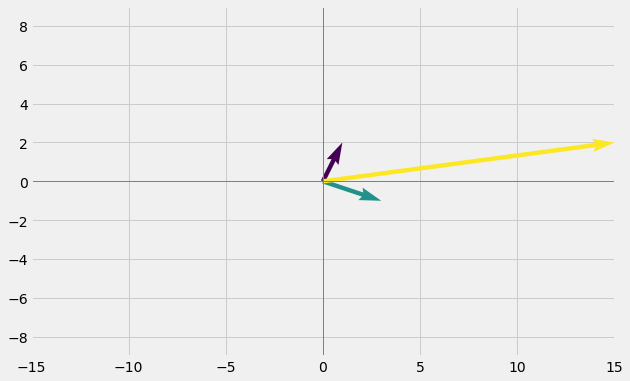

In [9]:
vector_plot(vector1)

Now we know the answer to this is a linear combination of the two vectors. So we multiply the first vector by 3 and the second vector by 4 and add the two

In [10]:
# VX1 vectors start at (0, 0), while VY2 starts at the end of VX1
vX2 = np.array([0,0,3,6])
vY2 = np.array([3,6,12,-4])
b = np.array([0,0,15,2])

In [11]:
vector2 = [vX2, vY2, b]

C:\Users\TURBULENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


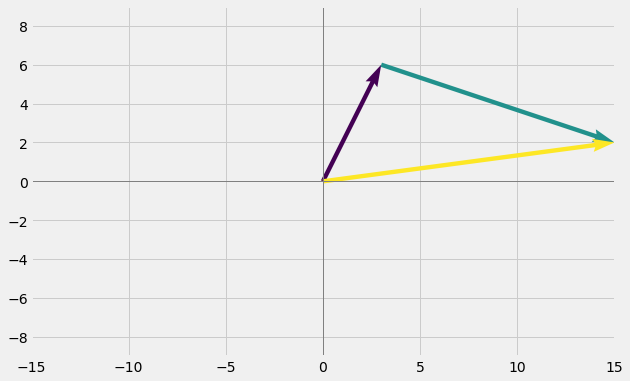

In [12]:
vector_plot(vector2)

## Matrix Way (2 x 2) - Using Elimination

Now our 2 variable, 2 equation problem is:

$$ x + 3y = 15 ~~~~ \space (eq1)$$
$$ 2x - y = 2 ~~~~ \space (eq2)$$

We can write this in a matrix way as:

$$ \begin{bmatrix}1x & 3y\\ 2x & -1y\end{bmatrix} = \begin{bmatrix}15 \\ 2\end{bmatrix} $$

However, to generalize it is better to write it in the form:

$$ Ax = b $$

$$ \begin{bmatrix}1 & 3\\ 2 & -1\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}15 \\ 2\end{bmatrix} $$



Now we can solve this using elimination as we did earlier in the algebraic formulation

### E<sub>1</sub> elimination
To remove `x` from the second equation matrix, we write our first slimination matrix

$$ E_{1} = \begin{bmatrix}1 & 0\\ -2 & 1\end{bmatrix} $$

So, we multiply $E_{1}$ to both sides.

$$ E_{1}Ax = E_{1}b $$

So our new equation is now:

$$ \begin{bmatrix}1 & 0\\ -2 & 1\end{bmatrix} \begin{bmatrix}1 & 3\\ 2 & -1\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}1 & 0\\ -2 & 1\end{bmatrix} \begin{bmatrix}15 \\ 2\end{bmatrix} $$

This can be reduced by matrix-multiplication to:

$$ \begin{bmatrix}1 & 3\\ 0 & -7\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}15 \\ -28\end{bmatrix} $$

which is now same as what we got after E1 elimination in algebraic formulation

$$ x + 3y = 15  ~~~~ \space (eq1) $$ 
$$  -7y = -28  ~~~~ \space (eq3)$$

### E<sub>2</sub> elimination
To remove `y` from the first equation matrix, we write our second slimination matrix

$$ E_{2} = \begin{bmatrix}1 & 3/7\\ 0 & -1/7\end{bmatrix} $$

So, we multiply $E_{2}$ to both sides.

$$ E_{2}E_{1}Ax = E_{2}E_{1}b $$

So our new equation is now:

$$ \begin{bmatrix}1 & 3/7\\ 0 & -1/7\end{bmatrix} \begin{bmatrix}1 & 3\\ 0 & -7\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}1 & 3/7\\ 0 & -1/7\end{bmatrix} \begin{bmatrix}15 \\ -28\end{bmatrix} $$

This can be reduced by matrix-multiplication to:


$$ \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}3 \\ 4\end{bmatrix} $$

Which is our answer 
$$ x = 3  ~~~~ \space (eq4) $$ 
$$  y = 4  ~~~~ \space (eq5)$$


In [13]:
from fractions import Fraction
A = np.matrix([[1,3],
               [2,-1]])

b = np.matrix([[15],
               [2]])

E1 = np.matrix([[1,0],
                [-2,1]])

E2 = np.matrix([[Fraction (1,1),Fraction(3, 7)],
                [Fraction(0,1),Fraction(-1, 7)]])

In [14]:
A

matrix([[ 1,  3],
        [ 2, -1]])

In [15]:
E1

matrix([[ 1,  0],
        [-2,  1]])

In [16]:
E1*A

matrix([[ 1,  3],
        [ 0, -7]])

In [17]:
E2*E1*A

matrix([[Fraction(1, 1), Fraction(0, 1)],
        [Fraction(0, 1), Fraction(1, 1)]], dtype=object)

In [18]:
E2*E1*b

matrix([[Fraction(3, 1)],
        [Fraction(4, 1)]], dtype=object)

## Matrix Way (2x2) - Using Inverse

Now our 2 variable, 2 equation problem is:

$$ x + 3y = 15 ~~~~ \space (eq1)$$
$$ 2x - y = 2 ~~~~ \space (eq2)$$

Now we know from the previous working that:

$$ E_{2}E_{1}Ax = E_{2}E_{1}b $$

and that I can change the brackets in my multiplication:

$$ E_{2}(E_{1}A) = (E_{2}E_{1})A $$

So I can first compute $E_{2}*E_{1}$ :
$$ E_{2}E_{1} =\begin{bmatrix}1 & 3/7\\ 0 & -1/7\end{bmatrix} \begin{bmatrix}1 & 0\\ -2 & 1\end{bmatrix} = \begin{bmatrix}1/7 & 3/7\\ 2/7 & -1/7\end{bmatrix} $$

And I know that 

$$ (E_{2}E_{1})A = I $$

$$ \begin{bmatrix}1/7 & 3/7\\ 2/7 & -1/7\end{bmatrix} \begin{bmatrix}1 & 3\\ 2 & -1\end{bmatrix} = \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix} $$

So now instead of calculating Elimination matrix, we need to just calculate $A^{-1}$ which when multiplied by $A$ gives the identity matrix - $I$

$$ A^{-1}A = I $$

$$ A^{-1} = \begin{bmatrix}1/7 & 3/7\\ 2/7 & -1/7\end{bmatrix} $$

Hence it follows that

$$ A^{-1}Ax = A^{-1}b $$

$$ Ix = A^{-1}b $$

$$ x = A^{-1}b $$


So we can calcuate $x$ easily once we know $A^{-1}$

$$ \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}1/7 & 3/7\\ 2/7 & -1/7\end{bmatrix} \begin{bmatrix}15\\ 2\end{bmatrix}  = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$$












In [19]:
E2*E1

matrix([[Fraction(1, 7), Fraction(3, 7)],
        [Fraction(2, 7), Fraction(-1, 7)]], dtype=object)

In [20]:
Ainv = np.linalg.inv(A)

In [21]:
Ainv

matrix([[ 0.14285714,  0.42857143],
        [ 0.28571429, -0.14285714]])

In [22]:
Ainv * b

matrix([[3.],
        [4.]])

# 3 x 3 Equation

Let take a more involved example - 3 linear equations, with 3 unknown.

$$ x + y + z = 3 $$
$$ 3x + 8y + z = 12 $$
$$ 5x - 4y + 3z = 4 $$

Parallel
$$ 4x + 9y + 2z = 15 $$



## Algebaric (3 x 3)


Now it is easy to solve the equation and get the answer

$$ x = 1, y = 1, z = 1 $$

## Row-wise / Planes (3 x 3)

Text(0.5, 0, 'z')

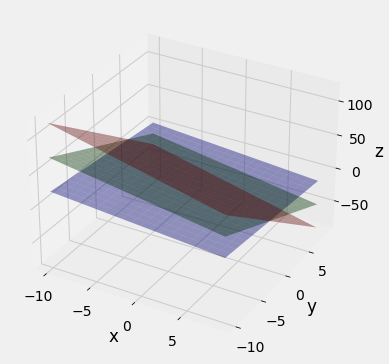

In [23]:
from mpl_toolkits.mplot3d import Axes3D
xrange = np.arange(-10, 10, 1)
yrange = np.arange(-10, 10, 1)
x, y = np.meshgrid(xrange, yrange)

z1 = 3 - x - y
z2 = 12 - 3*x - 8*y
z3 = (15  - 4*x -9 *y)/(2)

plt3d = plt.figure().gca(projection='3d')

plt3d.plot_surface(x,y,z1, color='blue', alpha = 0.4)
plt3d.plot_surface(x,y,z2, color='red', alpha = 0.4)
plt3d.plot_surface(x,y,z3, color='green', alpha = 0.4)

plt3d.set_xlabel('x')
plt3d.set_ylabel('y')
plt3d.set_zlabel('z')

## Column-wise  / Vectors (3 x 3)

$$ \begin{bmatrix}1 \\ 3 \\ 5\end{bmatrix} x + \begin{bmatrix}1 \\ 8 \\ -4\end{bmatrix} y + \begin{bmatrix}1 \\ 1 \\ 3\end{bmatrix} z = \begin{bmatrix}3 \\ 12 \\ 4 \end{bmatrix} $$

Now we need to draw these vectors and see the result

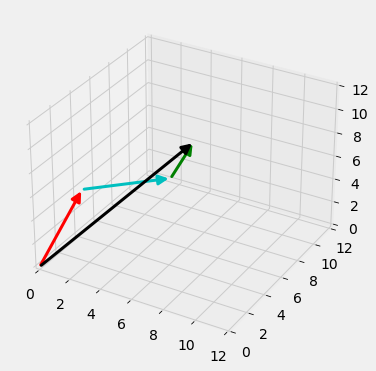

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
plt.figure()
ax = plt.gca(projection='3d')
vX = Arrow3D([0,1],[0,3],[0,5], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
vY = Arrow3D([1,2],[3,11],[5,1],mutation_scale=20, lw=3, arrowstyle="-|>", color="c")
vZ = Arrow3D([2,3],[11,12],[1,4], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
b = Arrow3D([0,3],[0,12],[0,4],mutation_scale=20, lw=3, arrowstyle="-|>", color="k")

ax.add_artist(vX)
ax.add_artist(vY)
ax.add_artist(vZ)
ax.add_artist(b)

ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_zlim([0,12])
plt.draw()

## Matrix Way (3 x 3)

Let us write it in the form 

$$ Ax = b $$

$$ \begin{bmatrix}1 & 1 & 1 \\ 3 & 8 & 1 \\ 5 & -4 & 3\end{bmatrix}\begin{bmatrix} x \\y \\ z\end{bmatrix}= \begin{bmatrix}3 \\ 12 \\ 4 \end{bmatrix} $$

Let us find:

$$ x = A^{-1}b $$

In [25]:
A1 = np.matrix([[1,1,1],
                [3,8,1],
                [5,-4,3]])

b1 = np.matrix([[3],
                [12],
                [4]])

In [26]:
A1

matrix([[ 1,  1,  1],
        [ 3,  8,  1],
        [ 5, -4,  3]])

In [27]:
b1

matrix([[ 3],
        [12],
        [ 4]])

In [28]:
A1inv = np.linalg.inv(A1)

In [29]:
A1inv

matrix([[-1.        ,  0.25      ,  0.25      ],
        [ 0.14285714,  0.07142857, -0.07142857],
        [ 1.85714286, -0.32142857, -0.17857143]])

In [30]:
A1inv*b1

matrix([[1.],
        [1.],
        [1.]])

## Exercises on Matrices

$$ U =  \begin{bmatrix}3 & 1 & 1 \\ 3 & 8 & 1 \\ 5 & -4 & 3\end{bmatrix}$$

$$ V =  \begin{bmatrix}2 & -3 & -4 \\ 3 & 5 & -6 \\ -1 & -3 & 2\end{bmatrix}$$

$$ W =  \begin{bmatrix}2 & 3 \\ -1 & 2 \\ -3 & 1\end{bmatrix}$$

$$ T =  \begin{bmatrix}2 & 3 \\ 4 & 6 \end{bmatrix}$$

$$ S =  \begin{bmatrix}3 & 1 & 2 \\ 1 & 4 & 5 \\ 2 & 5 & 6 \end{bmatrix}$$

$$ Z =  \begin{bmatrix}1 & - 1 & 0\end{bmatrix}$$

Write the matrices as np.matrix?

In [31]:
S = np.matrix([[3, 1, 2],
              [1 , 4, 5],
              [2 , 5 , 6]])

In [32]:
U = np.matrix([[3, 1, 1],
               [3, 8, 1],
               [5, -4, 3]])

In [33]:
V = np.matrix([[2, -3, -4],
               [3, 5,  -6],
               [-1, -3, 2]])

In [34]:
T = np.matrix([[2 ,3],
               [4 ,6]])

In [35]:
Z = np.matrix([[1, -1, 0]])

In [36]:
W = np.matrix([[2 ,3],
               [-1 ,2],
              [-3, 1]])

### 1. Matrix Addition

$$ \begin{bmatrix}a & b\\ c & d\end{bmatrix}  + \begin{bmatrix}e & f\\ g & h\end{bmatrix}   = \begin{bmatrix}a + e & b + f \\ c + g & d + h\end{bmatrix} $$



What is $ U + V$?

In [37]:
U+ V

matrix([[ 5, -2, -3],
        [ 6, 13, -5],
        [ 4, -7,  5]])

What is $ V + U $?

In [38]:
V+U

matrix([[ 5, -2, -3],
        [ 6, 13, -5],
        [ 4, -7,  5]])

What is $ W + U$?

In [52]:
if W.shape != U.shape: print ("IMPOSSIBLE!!! W.shape != U.shape")
else: W+U

IMPOSSIBLE!!! W.shape != U.shape


### 2. Scalar Multiplication 

$$ \beta * \begin{bmatrix}a & b\\ c & d\end{bmatrix}  = \begin{bmatrix}\beta a & \beta b\\ \beta c & \beta d \end{bmatrix} $$



What is $ 3 * U$ ?

In [40]:
3 * U

matrix([[  9,   3,   3],
        [  9,  24,   3],
        [ 15, -12,   9]])

What is $2.5 * W$?

In [41]:
2.5 * W

matrix([[ 5. ,  7.5],
        [-2.5,  5. ],
        [-7.5,  2.5]])

### 3. Matrix Multiplication

$$ A_{m \times n} * B_{n \times p} = C_{m \times p} $$

Example 1

$$ A_{2 \times 2} * B_{2 \times 2} = C_{2 \times 2} $$

$$ \begin{bmatrix}a & b\\ c & d\end{bmatrix} \begin{bmatrix}e & f\\ g & h\end{bmatrix}   = \begin{bmatrix}ae + bg & af + bh\\ ce + dg & cf + dh\end{bmatrix} $$

Example 2


$$ A_{3 \times 3} * B_{3 \times 1} = C_{3 \times 1} $$


$$ \begin{bmatrix}a & b & c \\ d & e & f \\ g & e & f\end{bmatrix} \begin{bmatrix}x \\ y \\ z \end{bmatrix}   = \begin{bmatrix}ax + by+ cz \\ dx + ey + fz \\ gx + ey + fz \end{bmatrix} $$

Here is a visual explanation for this - http://matrixmultiplication.xyz/


What is $ U * V$?

In [42]:
U*V

matrix([[  8,  -7, -16],
        [ 29,  28, -58],
        [ -5, -44,  10]])

What is $V * U$?

In [43]:
V*U

matrix([[-23,  -6, -13],
        [ -6,  67, -10],
        [ -2, -33,   2]])

What is $ U * W$?

In [44]:
U*W

matrix([[ 2, 12],
        [-5, 26],
        [ 5, 10]])

What is $ W * U$? Why does this not work?

In [50]:
if W.shape[1] != U.shape[0]: print ("IMPOSSIBLE!!! W.shape[1] != U.shape[0]")
else:  W *U

IMPOSSIBLE!!! W.shape[1] != U.shape[0]


What is $ Z * U$?

In [51]:
Z * U

matrix([[ 0, -7,  0]])

### 4. Matrix Inverse

What is inverse of $U$ i.e. $U^{-1}$?

In [53]:
np.linalg.inv(U)

matrix([[ 1.        , -0.25      , -0.25      ],
        [-0.14285714,  0.14285714,  0.        ],
        [-1.85714286,  0.60714286,  0.75      ]])

What is inverse of $T$ i.e. $T^{-1}$? Why does this not work?

In [37]:
T

matrix([[2, 3],
        [4, 6]])

In [57]:
if np.linalg.det(T) == 0: print("IMPOSSIBLE!!! T is singular matrix!")

else: np.linalg.inv(T)

IMPOSSIBLE!!! T is singular matrix!


What is inverse of $W$ i.e. $W^{-1}$? Why does this not work?

In [62]:
if W.shape[0]!=W.shape[1] : print("IMPOSSIBLE!!! Matrix is not square!")
else: np.linalg.inv(W)

IMPOSSIBLE!!! Matrix is not square!


### 4. Matrix Transpose

$$ {\begin{bmatrix}a & b\end{bmatrix}}^{T} = {\begin{bmatrix}a \\b\end{bmatrix}} $$

$$ {\begin{bmatrix}a & b\\ c & d\end{bmatrix}}^{T} = \begin{bmatrix}a&c\\b&d\end{bmatrix} $$

$$ {\begin{bmatrix}a&b\\c&d\\e&f\end{bmatrix}}^{T} =  \begin{bmatrix}a&c&e\\b&d&f\end{bmatrix} $$

What is transpose of $U$ i.e. $U^{T}$?

In [63]:
U.T

matrix([[ 3,  3,  5],
        [ 1,  8, -4],
        [ 1,  1,  3]])

Test whether $ {(UV)}^{T} = V^{T} U^{T}$ 

In [64]:
(U*V).T

matrix([[  8,  29,  -5],
        [ -7,  28, -44],
        [-16, -58,  10]])

In [65]:
(V.T)*(U.T)

matrix([[  8,  29,  -5],
        [ -7,  28, -44],
        [-16, -58,  10]])

What is transpose of $Z$ i.e. $Z^{T}$?

In [70]:
Z

matrix([[ 1, -1,  0]])

In [69]:
Z.T

matrix([[ 1],
        [-1],
        [ 0]])

### 5. Matrix Determinant

$$ \begin{Vmatrix} a & b \\ c & d \end{Vmatrix} = ad-bc $$


$$ \begin{Vmatrix}a&b&c\\d&e&f\\g&h&i\end{Vmatrix}  = a{\begin{Vmatrix}e&f\\h&i\end{Vmatrix}}-b{\begin{Vmatrix}d&f\\g&i\end{Vmatrix}}+c{\begin{Vmatrix}d&e\\g&h\end{Vmatrix}}\\ $$



What is the $||U||$?

In [71]:
np.linalg.det(U)

28.00000000000001

What is $||W||$?

In [74]:
if W.shape[0]!=W.shape[1] : print("IMPOSSIBLE!!! Matrix is not square!")
else: np.linalg.det(W)

IMPOSSIBLE!!! Matrix is not square!


What is $||S||$?

In [73]:
np.linalg.det(S)

-4.999999999999994

### 6. Matrix Symmetry

$$A^T = A$$

Test whether $V$ is symmetric?

In [79]:
V

matrix([[ 2, -3, -4],
        [ 3,  5, -6],
        [-1, -3,  2]])

In [78]:
V.T

matrix([[ 2,  3, -1],
        [-3,  5, -3],
        [-4, -6,  2]])

Test whether $S$ is symmetric?

In [80]:
S

matrix([[3, 1, 2],
        [1, 4, 5],
        [2, 5, 6]])

In [81]:
S.T

matrix([[3, 1, 2],
        [1, 4, 5],
        [2, 5, 6]])

### 7. Solve for Ax = b

Solve for $x$ in $ Ux = Z^{T} $?

In [94]:
np.linalg.inv(U) * Z.T

matrix([[ 1.25      ],
        [-0.28571429],
        [-2.46428571]])

Solve for $x$ in $ Vx = Z^{T} $? Is this solution correct?

In [97]:
if np.linalg.det(V) == 0: print("IMPOSSIBLE!!! V is singular matrix!")

else: np.linalg.inv(V) * Z.T

IMPOSSIBLE!!! V is singular matrix!
